In [1]:
# Plot the acute toxicity performance on small-sample endpoints
 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import os
import csv
from scipy.interpolate import interp1d
import joypy
from sklearn.manifold import TSNE

In [2]:
# t-sne
df_top_fea = pd.read_csv('./table_results/top_feature_fold2.csv')

In [7]:
df = pd.read_csv('/Users/jianglu/Desktop/Projects/Acute_Toxicity_NYAN/data/dataset.txt')
df_fold2 = pd.read_csv('/Users/jianglu/Desktop/Projects/Acute_Toxicity_NYAN/data/random split/test_fold_2.txt')
new_df = pd.merge(df_fold2, df, on='RTECS_ID')
val_float = new_df.values[:,2:].astype(float)

endpoint_name_list = list(df.columns.values[2:])
endpoint_name_list[1] = 'mammal_intraperitoneal_LD50'
endpoint_name_list[20] = 'mammal_oral_LD50'
endpoint_name_list[39] = 'mammal_unreported_LD50'
endpoint_name_list[47] = 'mammal_subcutaneous_LD50'
val_float = new_df.values[:,2:].astype(float)
target = np.nan_to_num(val_float)
flag = 1 -np.isnan(val_float)

In [96]:
# single endpoint

endpoint = 'dog_oral_LD50'

idx = np.where(flag[:,endpoint_name_list.index(endpoint)]==1)[0]
tox_value = target[idx,endpoint_name_list.index(endpoint)]

In [97]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
data_top_fea = df_top_fea.values[idx]
data_top_fea_tsne = tsne.fit_transform(data_top_fea)

/Users/jianglu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jianglu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


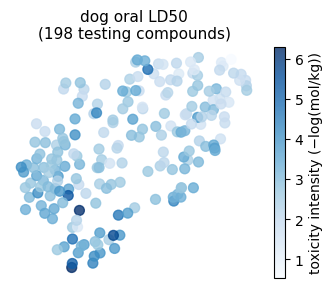

In [98]:
fig, ax = plt.subplots(figsize=(4, 3))
fig.patch.set_visible(False)
plt.axis('off')
dotsize = 50
dotcolor = 'Blues'

scatter = ax.scatter(data_top_fea_tsne[:, 0], data_top_fea_tsne[:, 1], c=tox_value, 
                       s=dotsize, cmap=dotcolor, alpha=0.8)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_xlim(-40,40)
# ax.set_ylim(-40,40)

# ax.scatter(58, 23, s=10)

a,b,c = endpoint.split('_')
figname = a+' '+b+' '+c+'\n({} testing compounds)'.format(len(tox_value))
ax.set_title(figname,fontsize=11)

cbar = plt.colorbar(scatter, ax=ax, label='toxicity intensity (−log(mol/kg))')

fig.savefig('figs/tsne_'+figname+'.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()